In [ ]:
%%shell

cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF


apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg


cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

apt-get update
apt-get install chromium chromium-driver

pip install -q selenium==4.9.0

Executing: /tmp/apt-key-gpghome.mqIac84cAk/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.1LP5gnyudI/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.ElmQEpSyMG/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.1
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

In [ ]:
# ブラウザをheadlessモード実行
options = webdriver.ChromeOptions()
#ヘッドレスモード（バックグラウンドで起動）で実行。コラボの場合、必須。
options.add_argument('--headless')
#サンドボックスモードの解除。これも必須。
options.add_argument('--no-sandbox')
#これも設定した方がよい。
options.add_argument('--disable-dev-shm-usage')

In [ ]:
#インスタンス化
driver = webdriver.Chrome('chromedriver',options=options)
#指定したドライバーが見つかるまで待機
driver.implicitly_wait(10)

#urlの指定
url="https://app.tmhub.jp/sign_in"

driver.get(url)
time.sleep(2)

print("サイトのタイトル：", driver.title)

サイトのタイトル： TeamHub Admin


<html lang="en"><head><meta charset="utf-8"/><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-NNVGJ6PP4E&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=27f28b15c16cfd6c831b2c8b83c99a77"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-13K7TDWBF2"></script><script src="/cdn-cgi/apps/head/vAmeDUH1_c6THugJtc4nMW84DYQ.js"></script><script src="/cdn-cgi/apps/body/yjd2RbfRlCw-Q8lF6qAR78T8v34.js"></script><link href="/favicon.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><title>TeamHub Admin</title><meta content="「TeamHub」はあらゆるチームスポーツを楽しむ人達に送る、チームマネジメントツールです。「TeamHub」を使えば、連絡や出欠管理、スコアの共有まで「TeamHub」1つで行うことができます。" name="description"/><meta content="チームマネジメントツール,スポーツチームマネジメント,出欠管理,スポーツスコア,スポーツ,TeamHub,チームハブ,Link Sports,リンクスポーツ" name="keywords"/><meta content
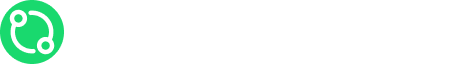
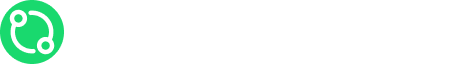
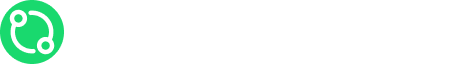
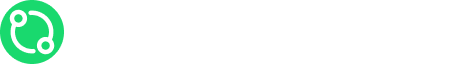

In [ ]:
html = driver.page_source
BeautifulSoup(html,"lxml")

<html lang="en"><head><meta charset="utf-8"/><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-NNVGJ6PP4E&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=27f28b15c16cfd6c831b2c8b83c99a77"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-13K7TDWBF2"></script><script src="/cdn-cgi/apps/head/vAmeDUH1_c6THugJtc4nMW84DYQ.js"></script><script src="/cdn-cgi/apps/body/yjd2RbfRlCw-Q8lF6qAR78T8v34.js"></script><link href="/favicon.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><title>TeamHub Admin</title><meta content="「TeamHub」はあらゆるチームスポーツを楽しむ人達に送る、チームマネジメントツールです。「TeamHub」を使えば、連絡や出欠管理、スコアの共有まで「TeamHub」1つで行うことができます。" name="description"/><meta content="チームマネジメントツール,スポーツチームマネジメント,出欠管理,スポーツスコア,スポーツ,TeamHub,チームハブ,Link Sports,リンクスポーツ" name="keywords"/><meta content
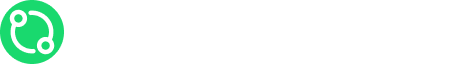
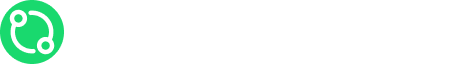

In [ ]:
login = "kkytmkmmkcrucial@gmail.com"
password = "hoge"

# ユーザー名入力
driver.find_element(By.NAME,"email").send_keys(login)

# パスワード入力
driver.find_element(By.NAME,"password").send_keys(password)

#ログインボタンクリック
btn = driver.find_element(By.XPATH,'//*[@id="root"]/div/div/div/div/div/div[2]/div[2]/div/div[1]/form/div[3]/button')
btn.click()

time.sleep(2)
html = driver.page_source
BeautifulSoup(html,"lxml")

In [ ]:
#ログイン後，メンバーページに遷移
url2="https://app.tmhub.jp/members"

driver.get(url2)
time.sleep(2)

print("サイトのタイトル：", driver.title)

サイトのタイトル： TeamHub Admin


In [ ]:
#メンバー一覧を表示
html = driver.page_source
soup=BeautifulSoup(html,"lxml")
##　要変数化自動取得
mem_list=soup.find_all(class_="MemberList_MemberListOpen__xA9ot")
print(mem_list)

[<div class="MemberList_MemberListOpen__xA9ot" id="1396874"><div><div class="Row_MemberListRow__VIMom"><div class="row"><div class="column number">9</div><div class="column name"><div class="Avatar_Avatar__sDxMC small avatar"><span class="Icon_Icon__Z1JUy icon-person medium icon"></span></div>佐々木（隆）</div><div class="column position"></div><div class="column role">Member</div><div class="column email"></div></div></div></div></div>, <div class="MemberList_MemberListOpen__xA9ot" id="1299400"><div><div class="Row_MemberListRow__VIMom"><div class="row"><div class="column number">88</div><div class="column name"><div class="Avatar_Avatar__sDxMC small avatar"><span class="Icon_Icon__Z1JUy icon-person medium icon"></span></div>笛田隆監督</div><div class="column position"></div><div class="column role">Administrator</div><div class="column email"></div></div></div></div></div>, <div class="MemberList_MemberListOpen__xA9ot" id="1356056"><div><div class="Row_MemberListRow__VIMom"><div class="row"><di

In [ ]:
import re
#login者
own='matsuo'
#メンバーidを上のdivから取得
target='id="[0-9]{7}'
idx=re.findall(target,str(mem_list))
avg_list=list()
avg_list.clear
for i in range(len(idx)):
  url3="https://app.tmhub.jp/members/"+str(idx[i][4:11])
  driver.get(url3)
  time.sleep(3)
  html = driver.page_source
  soup=BeautifulSoup(html,"lxml")
  #要変数化&自動取得
  name=soup.find_all(class_="MemberDetailView_MemberDetailBox__TjOHm")
  name_head=str(name).find('<dl class="MemberDetailView_MemberDetailBox__TjOHm"><dt>')
  name_end=str(name).find('</dt><dd>Number:')
  #loginした人だけ，html表記が異なる？
  if own  in str(name):
    name_end=str(name).find('<div class="MemberDetailView_EditButton')


  per_score=soup.find_all("li")
  target='AVG</span></div><div class="listValue">.*<.'
  per_score=re.findall(target,str(per_score))
  avg_head=str(per_score).find('AVG</span></div><div class="listValue">')
  avg_end=str(per_score).find('</div></li>, <li class="listItem"><div class="listKey"><span class="listkey">RBI')
  #名前,id,打率のリスト

  avg_list.append([str(name)[name_head+56:name_end],str(idx[i][4:11]),str(per_score)[avg_head+39:avg_end]])


print(avg_list)

[['佐々木（隆）', '1396874', '.375'], ['笛田隆監督', '1299400', '.000'], ['豊田\u3000勇登', '1356056', '.250'], ['山里岳', '1445788', '.000'], ['松林', '1396868', '.000'], ['毛利', '1396863', '.000'], ['工藤', '1402118', '.167'], ['名田', '1396866', '.200'], ['久米', '1550722', '.182'], ['宮園', '1396860', '.000'], ['宮下', '1402117', '.188'], ['佐野', '1402115', '.000'], ['佐々木孝朗', '1470269', '.000'], ['井口', '1402112', '.125'], ['松本誠之', '1433824', '.250'], ['みわ', '1299636', '.400'], ['宮部', '1550721', '.750'], ['三上', '1402108', '.214'], ['来見田 将大', '1365167', '.211'], ['高長竜也', '1364677', '.125'], ['池田陸', '1445027', '.556'], ['12 三浦卓也', '1433800', '.250'], ['松尾', '1396858', '.111'], ['matsuo_bot', '1433687', '.000'], ['みやべ', '1551666', '.000'], ['佐々木隆志', '1551579', '.000'], ['宮園 秀樹', '1551572', '.000'], ['管理用\u3000ナダアカウント', '1299611', '.000'], ['助っ人', '1299638', '.000'], ['菅澤', '1551355', '1.000']]


In [ ]:
 avg_list.sort(reverse=True, key=lambda x:x[2])
 print(avg_list[0][0])




菅澤


In [ ]:
import csv

csv_path = "/content/drive/MyDrive/"

csv_name = 'personal_score.csv'
for i in range(len(avg_list)):
    del avg_list[i][1]
print(avg_list)
with open(csv_path+csv_name, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(avg_list)

[['菅澤', '1.000'], ['宮部', '.750'], ['池田陸', '.556'], ['みわ', '.400'], ['佐々木（隆）', '.375'], ['豊田\u3000勇登', '.250'], ['松本誠之', '.250'], ['12 三浦卓也', '.250'], ['三上', '.214'], ['来見田 将大', '.211'], ['名田', '.200'], ['宮下', '.188'], ['久米', '.182'], ['工藤', '.167'], ['井口', '.125'], ['高長竜也', '.125'], ['松尾', '.111'], ['笛田隆監督', '.000'], ['山里岳', '.000'], ['松林', '.000'], ['毛利', '.000'], ['宮園', '.000'], ['佐野', '.000'], ['佐々木孝朗', '.000'], ['matsuo_bot', '.000'], ['みやべ', '.000'], ['佐々木隆志', '.000'], ['宮園 秀樹', '.000'], ['管理用\u3000ナダアカウント', '.000'], ['助っ人', '.000']]
